## 1. Necessary Imports

In [1]:
import os
import nltk
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm_notebook as tqdm
from operator import itemgetter
from tabulate import tabulate

In [2]:
nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

## 2. Mounting with GDrive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3. Declaring global variables

In [4]:
DATASET_DIR = 'drive/MyDrive/datasets'

In [5]:
def load_pickle_file(filename):
    with open(filename, 'r') as f:
        file = pickle.load(f)
    return file

In [6]:
X = np.load(os.path.join(DATASET_DIR, 'merged_dataset_X.npy'))
y = np.load(os.path.join(DATASET_DIR, 'merged_dataset_y.npy'))

In [7]:
X[:5]

array([' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing',
       ' Drunk Bragging Trump Staffer Started Russian Collusion Investigation',
       ' Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’',
       ' Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)',
       ' Pope Francis Just Called Out Donald Trump During His Christmas Speech'],
      dtype='<U305')

In [20]:
Counter(y).values()

dict_values([23481, 36417, 9000])

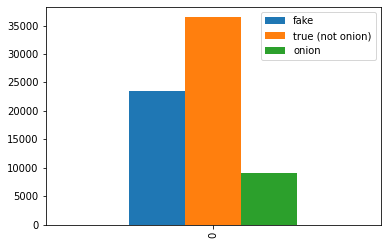

In [21]:
df = pd.DataFrame(Counter(y).values(), index=['fake', 'true (not onion)', 'onion'])
df.T.plot.bar()

## 4. POS Tagging Analysis

### 4.1 Tokenisation (using NLTK)


In [ ]:
X_tokens = []
for x in tqdm(X):
    X_tokens.append(nltk.word_tokenize(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


### 4.2 POS Tagging (using NLTK)
- 0 : real
- 1 : onion
- 2 : fake

In [ ]:
X_pos = []
X_pos_real = []
X_pos_onion = []
X_pos_fake = []
for i, tokens in tqdm(enumerate(X_tokens)):
    pos_list = list(map(lambda x:x[1], nltk.pos_tag(tokens)))
    X_pos.extend(pos_list)
    if y[i] == '0':
        X_pos_real.extend(pos_list)
    elif y[i] == '1':
        X_pos_onion.extend(pos_list)
    else:
        X_pos_fake.extend(pos_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [ ]:
print(len(X_pos))
print(len(X_pos_real))
print(len(X_pos_onion))
print(len(X_pos_fake))

985488
425580
136544
423364


In [ ]:
pos_counts = Counter(X_pos)
pos_real_counts = Counter(X_pos_real)
pos_onion_counts = Counter(X_pos_onion)
pos_fake_counts = Counter(X_pos_fake)

### Normalizing counts

In [ ]:
for i in [pos_counts, pos_real_counts, pos_onion_counts, pos_fake_counts]:
    total = 1.0 * len(i)
    for k in i:
        i[k] /= total
print("normalized counts")
print(pos_counts)

normalized counts
Counter({'NNP': 5.7513499041241026e-05, 'NN': 1.4416548412318293e-05, 'IN': 1.1868560499045757e-05, 'JJ': 5.915675762082142e-06, 'NNS': 5.373665027975327e-06, 'VBZ': 3.7622407935713193e-06, 'TO': 3.6123024059007847e-06, 'VB': 3.377058998039017e-06, 'DT': 3.01130855605593e-06, ':': 2.685661120333988e-06, 'VBD': 2.383303746667487e-06, 'VBG': 2.2249588868941005e-06, ',': 2.0832891603083383e-06, 'PRP': 1.9722134797362324e-06, 'RB': 1.8764348221709554e-06, 'CD': 1.6648949094188684e-06, 'VBP': 1.6636546102561529e-06, 'POS': 1.21948969898581e-06, '.': 1.2165956676061393e-06, 'VBN': 1.0866398775571374e-06, 'CC': 9.973383378415984e-07, 'PRP$': 8.044029125302487e-07, 'NNPS': 6.846451378191323e-07, 'MD': 6.463336747930215e-07, ')': 6.085734558392289e-07, '(': 6.081600227849903e-07, "''": 4.5698133595173975e-07, 'RP': 3.8738677182157433e-07, 'WRB': 3.41495702801089e-07, 'WP': 3.1062603475127305e-07, '$': 2.1333145598712092e-07, 'JJR': 1.9321104734750877e-07, 'JJS': 1.198955857291

### 4.3 Plotting Histogram of POS Tags of the entire dataset

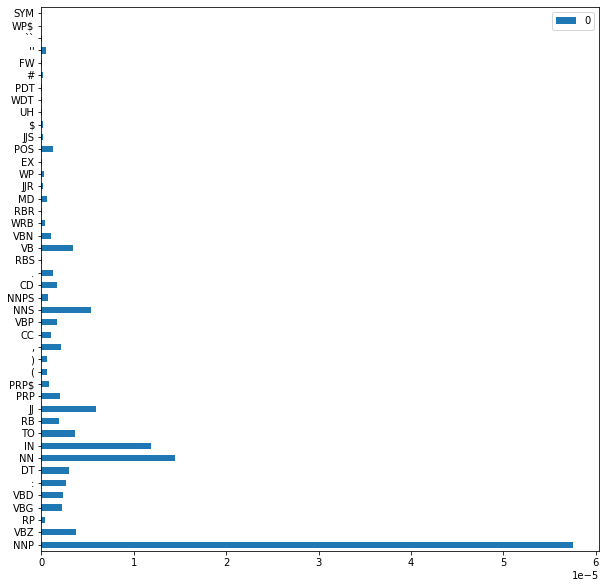

In [ ]:
df = pd.DataFrame.from_dict(pos_counts, orient='index')
df.plot(kind='barh', figsize=(10,10))

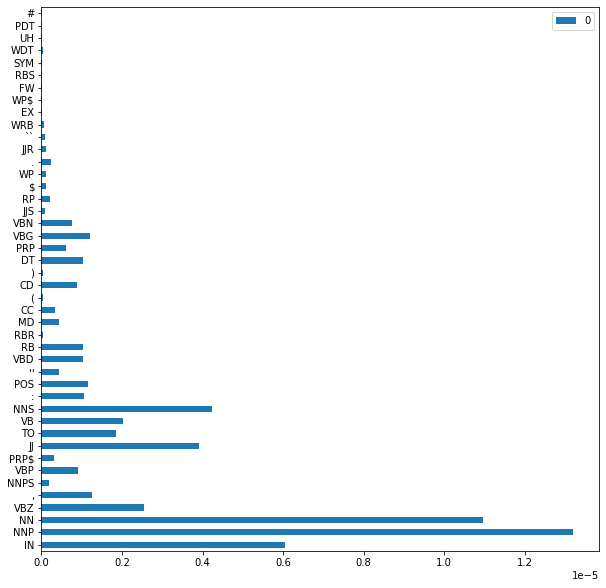

In [ ]:
df1 = pd.DataFrame.from_dict(pos_real_counts, orient='index')
df1.plot(kind='barh', figsize=(10,10))

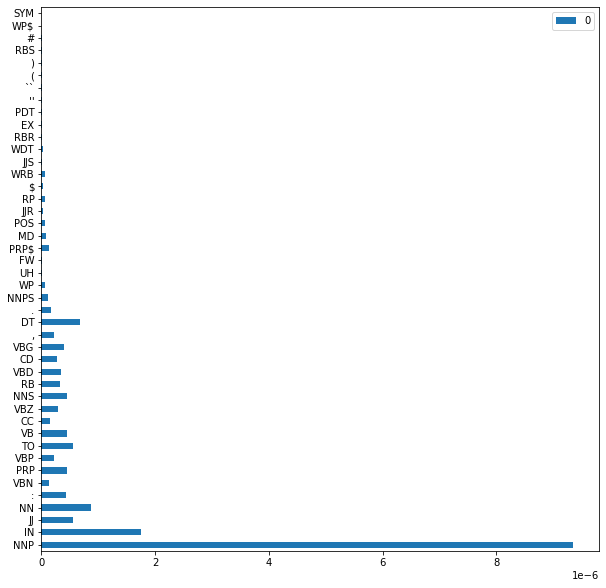

In [ ]:

df2 = pd.DataFrame.from_dict(pos_onion_counts, orient='index')
df2.plot(kind='barh', figsize=(10,10))

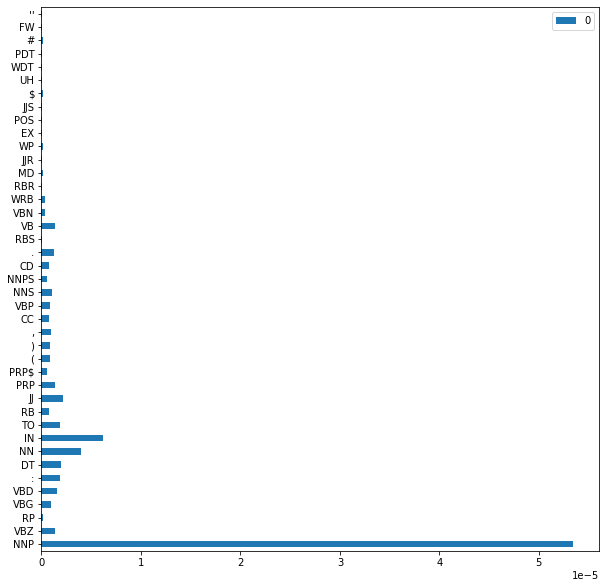

In [ ]:

df3 = pd.DataFrame.from_dict(pos_fake_counts, orient='index')
df3.plot(kind='barh', figsize=(10,10))

## 4.4  Statistics of top-n POS tags from each dataset

In [ ]:
for i in ["pos_counts", "pos_real_counts", "pos_onion_counts", "pos_fake_counts"]:
    res = dict(sorted(eval(i).items(), key = itemgetter(1), reverse = True )[:10])
    print(f"top 10 POS tags for {i} are: ")
    print(tabulate(res.items(), headers=["POS", "Normalized count"]))

top 10 POS tags for pos_counts are: 
POS      Normalized count
-----  ------------------
NNP           5.75135e-05
NN            1.44165e-05
IN            1.18686e-05
JJ            5.91568e-06
NNS           5.37367e-06
VBZ           3.76224e-06
TO            3.6123e-06
VB            3.37706e-06
DT            3.01131e-06
:             2.68566e-06
top 10 POS tags for pos_real_counts are: 
POS      Normalized count
-----  ------------------
NNP           1.31987e-05
NN            1.09638e-05
IN            6.06093e-06
NNS           4.22735e-06
JJ            3.91852e-06
VBZ           2.55116e-06
VB            2.02775e-06
TO            1.84391e-06
,             1.24347e-06
VBG           1.20392e-06
top 10 POS tags for pos_onion_counts are: 
POS      Normalized count
-----  ------------------
NNP           9.34648e-06
IN            1.75296e-06
NN            8.69725e-07
DT            6.84921e-07
TO            5.59099e-07
JJ            5.48901e-07
VB            4.54776e-07
NNS           4.49677

## 5. Feature Engineering
From the result above, we can observe that not all tags were used in each labeled data in the training set. We will omit such less used data for better training.